In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [135]:
df=pd.read_csv("/content/marriage_data_india.csv")
df.head(5)

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


In [136]:
df.shape

(10000, 18)

In [137]:
df.dtypes

,0
ID,int64
Marriage_Type,object
Age_at_Marriage,int64
Gender,object
Education_Level,object
Caste_Match,object
Religion,object
Parental_Approval,object
Urban_Rural,object
Dowry_Exchanged,object


In [138]:
df.isnull().sum()

,0
ID,0
Marriage_Type,0
Age_at_Marriage,0
Gender,0
Education_Level,0
Caste_Match,0
Religion,0
Parental_Approval,0
Urban_Rural,0
Dowry_Exchanged,0


In [139]:
df.drop_duplicates(inplace=True)

In [140]:
df.shape

(10000, 18)

In [141]:
df.columns

Index(['ID', 'Marriage_Type', 'Age_at_Marriage', 'Gender', 'Education_Level',
       'Caste_Match', 'Religion', 'Parental_Approval', 'Urban_Rural',
       'Dowry_Exchanged', 'Marital_Satisfaction', 'Divorce_Status',
       'Children_Count', 'Income_Level', 'Years_Since_Marriage',
       'Spouse_Working', 'Inter-Caste', 'Inter-Religion'],
      dtype='object')

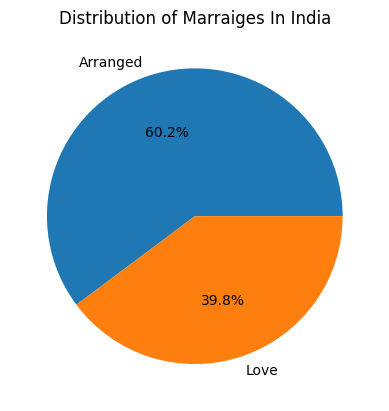

In [142]:
# Get the values and index (marriage types) from the value_counts Series
values = df['Marriage_Type'].value_counts().values
index = df['Marriage_Type'].value_counts().index

# Create the pie chart with labels
plt.pie(values, labels=index, autopct='%1.1f%%')
plt.title("Distribution of Marraiges In India")
plt.show()

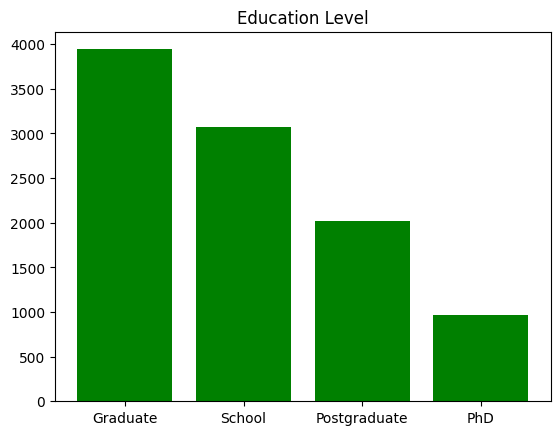

In [143]:
plt.bar(df['Education_Level'].value_counts().index,df['Education_Level'].value_counts(), color='green')
plt.title("Education Level")
plt.show()

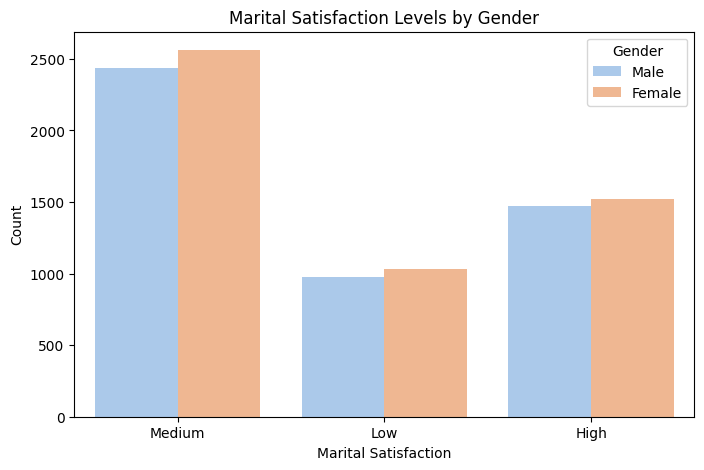

In [144]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Satisfaction', hue='Gender', data=df, palette='pastel')
plt.title('Marital Satisfaction Levels by Gender')
plt.xlabel('Marital Satisfaction')
plt.ylabel('Count')
plt.legend(title="Gender")
plt.show()


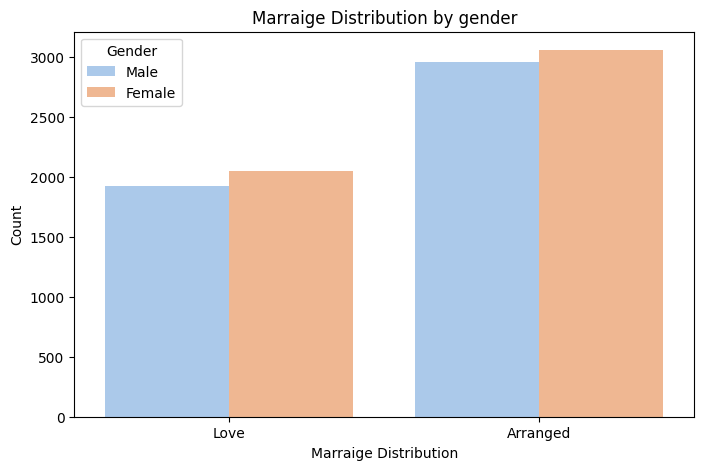

In [145]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Marriage_Type', hue='Gender', data=df, palette='pastel')
plt.title("Marraige Distribution by gender")
plt.xlabel('Marraige Distribution')
plt.ylabel('Count')
plt.legend(title="Gender")
plt.show()

In [146]:
df.columns

Index(['ID', 'Marriage_Type', 'Age_at_Marriage', 'Gender', 'Education_Level',
       'Caste_Match', 'Religion', 'Parental_Approval', 'Urban_Rural',
       'Dowry_Exchanged', 'Marital_Satisfaction', 'Divorce_Status',
       'Children_Count', 'Income_Level', 'Years_Since_Marriage',
       'Spouse_Working', 'Inter-Caste', 'Inter-Religion'],
      dtype='object')

In [147]:
df['Religion'].value_counts()

,count
Religion,
Hindu,6034
Muslim,1939
Christian,990
Others,531
Sikh,506


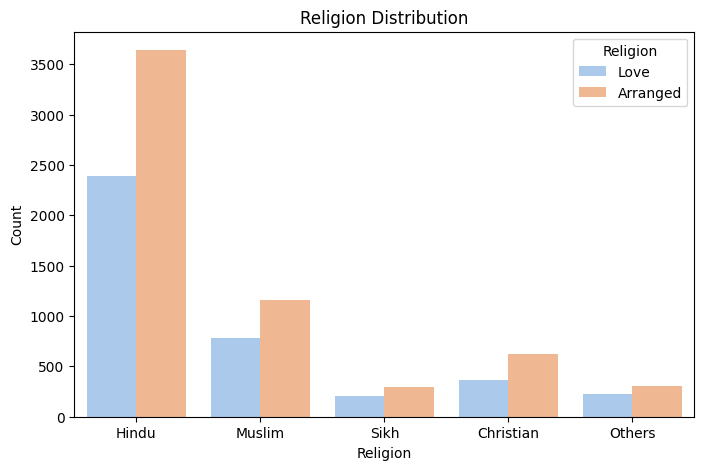

In [148]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Religion', hue='Marriage_Type', data=df, palette='pastel')
plt.title("Religion Distribution")
plt.xlabel('Religion')
plt.ylabel('Count')
plt.legend(title="Religion")
plt.show()

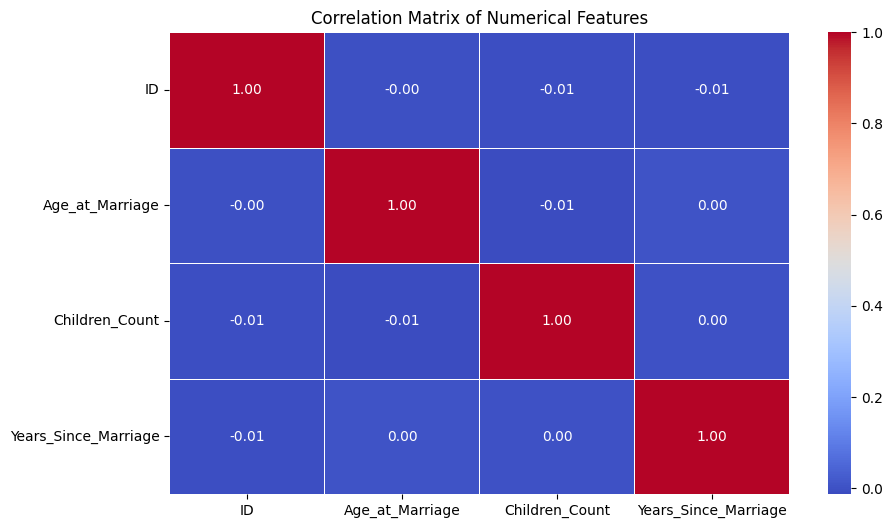

In [149]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("Correlation Matrix of Numerical Features")

# Show plot
plt.show()

EDA


In [150]:
df=pd.get_dummies(df,columns=['Marriage_Type','Gender','Education_Level','Caste_Match','Religion','Parental_Approval',
                              'Urban_Rural','Dowry_Exchanged','Marital_Satisfaction','Divorce_Status','Spouse_Working','Inter-Caste','Inter-Religion'], drop_first=True)

In [151]:
df=pd.get_dummies(df,columns=['Income_Level'], drop_first=True)

In [152]:
df.shape

(10000, 27)

In [153]:
for i in df.columns:
  if df[i].dtype != np.int64: # Check if the column is not already of type int64
    try:  # Attempt conversion to int64
      df[i] = pd.to_numeric(df[i], errors='raise').astype(np.int64)
      #pd.to_numeric with error='raise' will raise an exception immediately for the problematic values and stop execution

    except ValueError as e:
      # Handle the exception if conversion fails
      print(f"Could not convert column '{i}' to int64 due to non-numeric values: {e}")
      # You might choose to keep the column as is, or handle the non-numeric values in a different way.

In [154]:
df.columns

Index(['ID', 'Age_at_Marriage', 'Children_Count', 'Years_Since_Marriage',
       'Marriage_Type_Love', 'Gender_Male', 'Education_Level_PhD',
       'Education_Level_Postgraduate', 'Education_Level_School',
       'Caste_Match_Same', 'Religion_Hindu', 'Religion_Muslim',
       'Religion_Others', 'Religion_Sikh', 'Parental_Approval_Partial',
       'Parental_Approval_Yes', 'Urban_Rural_Urban',
       'Dowry_Exchanged_Not Disclosed', 'Dowry_Exchanged_Yes',
       'Marital_Satisfaction_Low', 'Marital_Satisfaction_Medium',
       'Divorce_Status_Yes', 'Spouse_Working_Yes', 'Inter-Caste_Yes',
       'Inter-Religion_Yes', 'Income_Level_Low', 'Income_Level_Middle'],
      dtype='object')

In [155]:
Y=df['Divorce_Status_Yes']
X=df.drop(columns=['Divorce_Status_Yes'])

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [159]:
Y_pred=model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))


0.893


In [160]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.7845


In [161]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.893


In [163]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(8, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (Binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [166]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=2, verbose=1)


Epoch 1/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9061 - loss: 0.3017
Epoch 2/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8975 - loss: 0.3163
Epoch 3/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9004 - loss: 0.3064
Epoch 4/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9028 - loss: 0.3018
Epoch 5/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9016 - loss: 0.3028
Epoch 6/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9069 - loss: 0.2872
Epoch 7/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8984 - loss: 0.3019
Epoch 8/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8974 - loss: 0.3066
Epoch 9/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8990 - loss: 0.3072
Epoch 10/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9015 - loss: 0.2862
Epoch 11/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9015 - loss: 0.2928
Epoch 12/100
4

In [167]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [172]:
y_pred_classes = (y_pred > 0.5).astype(int)

# Print Accuracy & Classification Report
print("Accuracy:", accuracy_score(Y_test, y_pred_classes))
print("Classification Report:\n", classification_report(Y_test, y_pred_classes))

Accuracy: 0.882
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1786
           1       0.13      0.02      0.03       214

    accuracy                           0.88      2000
   macro avg       0.51      0.50      0.48      2000
weighted avg       0.81      0.88      0.84      2000

